In [1]:
from pathlib import Path
datasetPath = Path.cwd().parent / 'PreprocessedData' / 'ReviewsDataset.csv'
import pandas as pd
df = pd.read_csv(datasetPath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3501 non-null   object
 1   Mood     3501 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB


<Axes: >

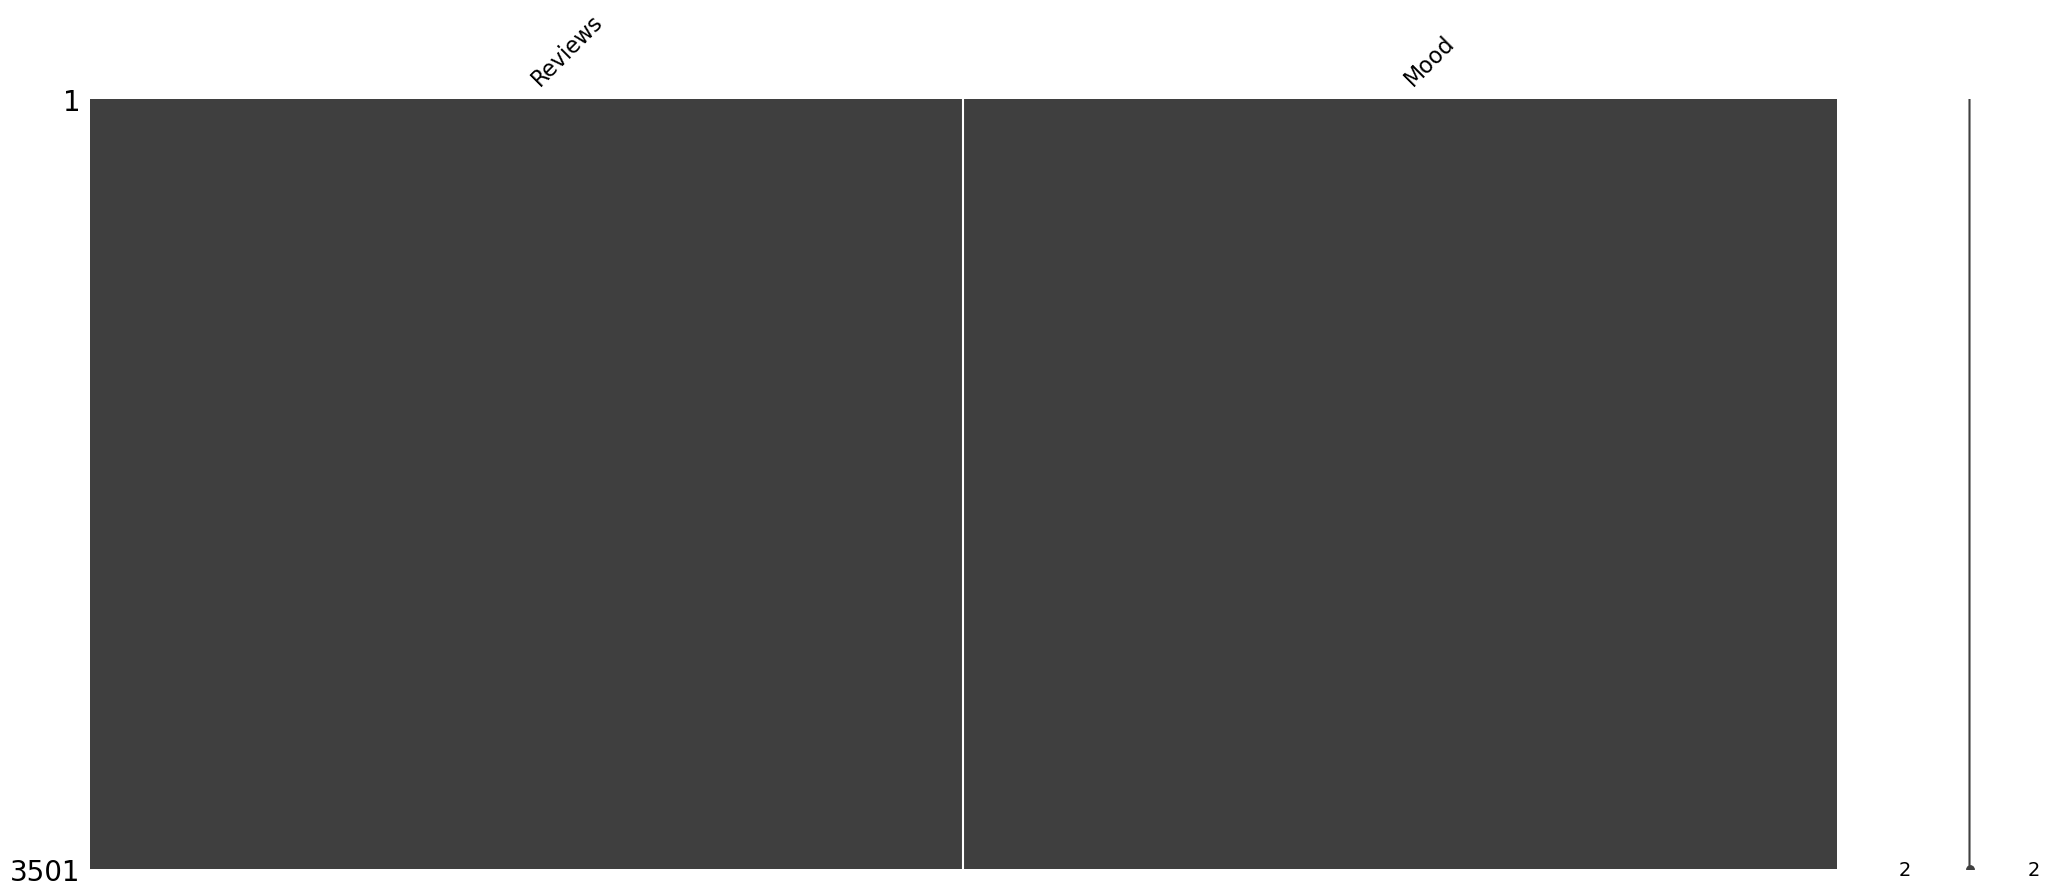

In [3]:
import missingno as msno
msno.matrix(df)

In [5]:
len(df.duplicated())

3501

<Axes: xlabel='Reviews', ylabel='Count'>

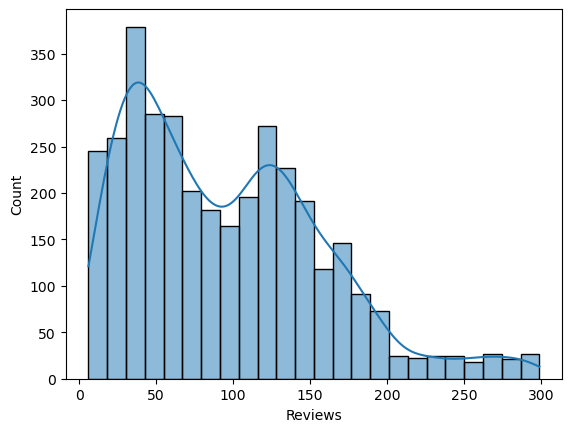

In [7]:
import seaborn as sns
sns.histplot(df['Reviews'].apply(lambda text: len(text.split())), kde = True)

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.Reviews
y = df.Mood
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [33]:
estrimators = [RandomForestClassifier(), MultinomialNB(), LogisticRegression(), LinearSVC()]
for estrimator in estrimators:
    pipeline = make_pipeline(TfidfVectorizer(stop_words = 'english'), estrimator)
    model = pipeline.fit(X_train, y_train)
    print(cross_val_score(model, X_train, y_train, cv = 10).mean())

0.8878571428571428
0.8796428571428573
0.9164285714285715
0.9217857142857143


In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
pipeline = make_pipeline(TfidfVectorizer(stop_words = 'english'), LinearSVC())
model = pipeline.fit(X_train, y_train)

paramGrid = {'tfidfvectorizer__max_features' : [2000, 3000, 5000],
             'linearsvc__C' : [0.1, 1, 10, 100],
             'linearsvc__loss' : ['hinge', 'squared_hinge']
            }

modelValid = GridSearchCV(model, paramGrid, cv = 10)

In [41]:
modelValid.fit(X_train, y_train)

/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yitik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarni

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [0.1, 1, 10, 100],
                         'linearsvc__loss': ['hinge', 'squared_hinge'],
                         'tfidfvectorizer__max_features': [2000, 3000, 5000]})

In [43]:
modelValid.score(X_test, y_test)

0.8944365192582026

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [51]:
cm = confusion_matrix(y_test, modelValid.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels = modelValid.classes_)

In [53]:
import matplotlib.pyplot as plt 

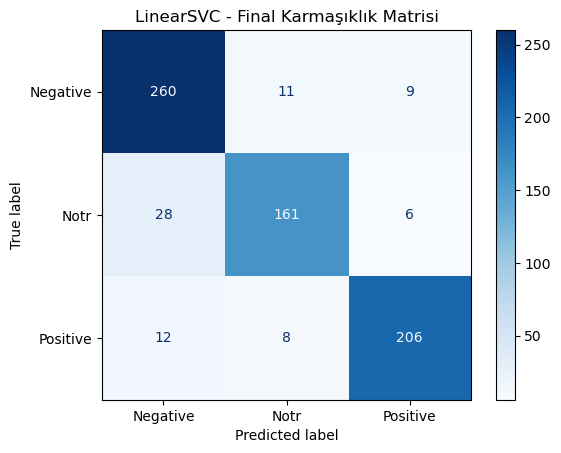

In [55]:
disp.plot(cmap='Blues')
plt.title("LinearSVC - Final Karmaşıklık Matrisi")
plt.show()